In [69]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu

import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


Valores totais: 


Class
3    1696
1    1657
2    1647
Name: count, dtype: int64

<Axes: >

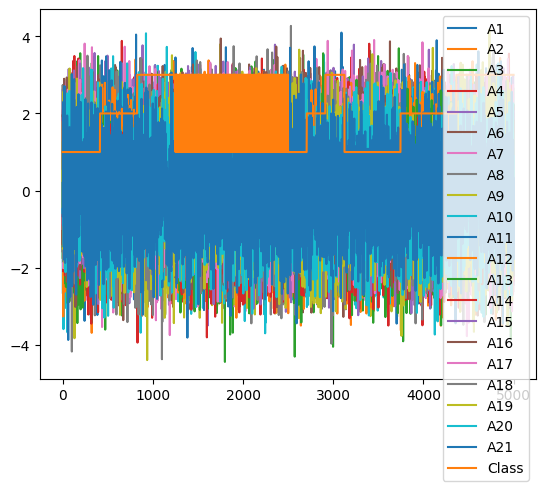

In [70]:
#DF
df = pd.read_csv('WDVG.csv')
#display(df)
print('Valores totais: ')
display((df.iloc[:, -1]).value_counts())

df.plot()


In [71]:
# CLASSIFICADORES


acuracia_melhor_knn=[]
acuracia_melhor_arvore = []
acuracia_melhor_svm = []
acuracia_melhor_mlp = []
acuracia_naive_bayes = []

proba_knn = []
proba_arvore = [] 
proba_svm = []
proba_mlp = []
proba_nb = []


loop = 2
for i in range(loop):

    print("\n\nExecução: ", i+1)
    
    #CALIBRAGEM
    print("\nCalibragem-", i+1)
    
    x = df.iloc[:, :-1]  # Todos exceto a última coluna
    y = df.iloc[:, -1]   # última coluna

    # 70% para treinamento - 15% para validação - 15% para teste
    x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5, shuffle = True)
    x_validacao, x_teste, y_validacao, y_teste = train_test_split(x_teste, y_teste, test_size=0.5)

    #KNN

    print("KNN")
    # Defina os hiperparâmetros que deseja otimizar
    param_grid = {
        'n_neighbors': list(range(1, 50)),  # Valores de k
        'weights': ['uniform', 'distance'],  # Tipo de ponderação
        'metric': ["euclidean", "manhattan"]  # Métrica de distância (1 para distância Manhattan, 2 para distância Euclidiana)
    }

    best_accuracy = 0  # melhor acurácia
    best_paramsKNN = {}  # melhores hiperparâmetros

    for n_neighbors in param_grid['n_neighbors']:
        for weights in param_grid['weights']:
            for metric in param_grid['metric']:
                knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)
                knn.fit(x_treino, y_treino)
                opiniao = knn.predict(x_validacao)
                accuracy = accuracy_score(y_validacao, opiniao)
                #print("Acc: ", accuracy)

                if accuracy > best_accuracy:

                    best_accuracy = accuracy
                    best_paramsKNN = {
                        'n_neighbors': n_neighbors,
                        'weights': weights,
                        'metric': metric
                    }

    #print(f"Melhores Hiperparâmetros: {best_paramsKNN}")
    #print("Acc: ", best_accuracy)




    ##AD -maior profundidade - número mínimo de chaves por folha - critério (gini ou entropy)
    print("AD")
    param_grid = {
        'max_depth': list(range(1, 21)),  # Profundidade da árvore
        'min_samples_leaf': list(range(1, 11)),  # Número mínimo de amostras por folha
        'criterion': ['gini', 'entropy'],  # Critério de divisão da árvore
        'min_samples_split': list(range(2, 4))  # Número mínimo de amostras para dividir um nó
    }

    best_accuracy = 0  # Melhor acurácia

    for max_depth in param_grid['max_depth']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            for criterion in param_grid['criterion']:
                for min_samples_split in param_grid['min_samples_split']:
                    dt_classifier = DecisionTreeClassifier(
                        max_depth=max_depth,
                        min_samples_leaf=min_samples_leaf,
                        criterion=criterion,
                        min_samples_split=min_samples_split
                    )
                    dt_classifier.fit(x_treino, y_treino)
                    opiniao = dt_classifier.predict(x_validacao)
                    accuracy = accuracy_score(y_validacao, opiniao)

                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_paramsAD = {
                            'max_depth': max_depth,
                            'min_samples_leaf': min_samples_leaf,
                            'criterion': criterion,
                            'min_samples_split': min_samples_split
                        }




    #print(f"Melhores Hiperparâmetros: {best_paramsAD}")
    #print("Melhor Acurácia: ", best_accuracy)


    print("SVM")
    #SVM - SVM -tipo do kernel (linear, rbf, polinomial, sigmoid), variação do erro C (entre 0.1 e 1)
    # Defina os hiperparâmetros que deseja otimizar
    param_grid = {
        'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Tipo de kernel
        'C': [0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1.0]  # Variação do parâmetro C
    }

    best_accuracy = 0  # melhor acurácia
    best_paramsSVM = {}  # melhores hiperparâmetros

    loop = 0
    for kernel in param_grid['kernel']:
        for C in param_grid['C']:
            svm = SVC(kernel=kernel, C=C)
            svm.fit(x_treino, y_treino)
            opiniao = svm.predict(x_validacao)
            accuracy = accuracy_score(y_validacao, opiniao)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_paramsSVM = {
                    'kernel': kernel,
                    'C': C
                }

    #print("Melhores Hiperparâmetros:", best_paramsSVM)
    #print("Melhor Acuracia: ", best_accuracy )

    #MLP - número de épocas,taxa de aprendizagem, função de ativação (relu, sigmoid, tangente hiperbólica, logística) e número de camadas escondidas
    # Defina o param_grid com as combinações de hiperparâmetros
    print("MLP")
    param_grid = {
        'hidden_layer_sizes': [(10,), (20,), (30,)],
        'activation': ['relu', 'logistic', 'tanh', 'identity'],
        'solver': ['adam'],
        'max_iter': [100, 200, 300],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }

    best_accuracy = 0
    best_paramsMLP = {}


    # Itere sobre as combinações de hiperparâmetros
    for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
        for activation in param_grid['activation']:
            for max_iter in param_grid['max_iter']:
                for learning_rate_init in param_grid['learning_rate_init']:
                    # Crie um classificador MLP com os hiperparâmetros
                    mlp = MLPClassifier(
                        hidden_layer_sizes=hidden_layer_sizes,
                        activation=activation,
                        solver='adam',
                        max_iter=max_iter,
                        learning_rate_init=learning_rate_init
                    )

                    mlp.fit(x_treino, y_treino)

                    opiniao = mlp.predict(x_validacao)

                    accuracy = accuracy_score(y_validacao, opiniao)

                    # Verifique se a acurácia é a melhor até agora
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_paramsMLP = {
                            'hidden_layer_sizes': hidden_layer_sizes,
                            'activation': activation,
                            'max_iter': max_iter,
                            'learning_rate_init': learning_rate_init
                        }

    # Exiba os melhores hiperparâmetros encontrados
    #print("Melhores Hiperparâmetros:", best_paramsMLP)
    #print("Melhor Acuracia: ", best_accuracy )

    #TREINAMENTO


    print("\nTreinamento-", i+1)



    #KNN
    print("KNN")
    knn = KNeighborsClassifier(
                    n_neighbors=best_paramsKNN['n_neighbors'],
                    weights=best_paramsKNN['weights'],
                    metric=best_paramsKNN['metric']
                    )
    knn.fit(x_treino, y_treino)
    opiniao = knn.predict(x_teste)  
    acuracia_melhor_knn.append(accuracy_score(y_teste, opiniao))
    proba_knn.append(knn.predict_proba(x_teste)[:,1])


    print("AD")
    #Árvore de decisão
    arvoreDecisao = DecisionTreeClassifier(
                        max_depth=best_paramsAD['max_depth'],
                        min_samples_leaf=best_paramsAD['min_samples_leaf'],
                        criterion=best_paramsAD['criterion'],
                        min_samples_split=best_paramsAD['min_samples_split']
                    )
    arvoreDecisao.fit(x_treino, y_treino)
    opiniao = arvoreDecisao.predict(x_teste)
    acuracia_melhor_arvore.append(accuracy_score(y_teste, opiniao))
    proba_arvore.append(arvoreDecisao.predict_proba(x_teste)[:,1]) 



    print("NB")
    #NaiveBayes
    naive_bayes = GaussianNB()
    grid_search = GridSearchCV(estimator=naive_bayes, param_grid={}, scoring='accuracy')
    grid_search.fit(x_treino, y_treino)
    nBayes = grid_search.best_estimator_
    opiniao = nBayes.predict(x_teste)
    acuracia_naive_bayes.append(accuracy_score(y_teste, opiniao))
    proba_nb.append(nBayes.predict_proba(x_teste)[:,1])


    print("SVM")
    #SVM
    svm = SVC(
            kernel=best_paramsSVM['kernel'],
            C=best_paramsSVM['C'],
            probability=True
            )
    svm.fit(x_treino, y_treino)
    opiniao = svm.predict(x_teste)
    acuracia_melhor_svm.append(accuracy_score(y_teste, opiniao))
    a = svm.predict_proba(x_teste)[:,1]
    proba_svm.append(a)


    print("MLP")
    #MLP
    mlp = MLPClassifier(
                        hidden_layer_sizes=best_paramsMLP['hidden_layer_sizes'],
                        activation=best_paramsMLP['activation'],
                        solver='adam',
                        max_iter=best_paramsMLP['max_iter'],
                        learning_rate_init=best_paramsMLP['learning_rate_init']
                    )
    mlp.fit(x_treino, y_treino)
    opiniao = mlp.predict(x_teste)
    acuracia_melhor_mlp.append(accuracy_score(y_teste, opiniao))
    proba_mlp.append(svm.predict_proba(x_teste)[:,1])

    print("\nAcuracias:")
    print("KNN: ", *acuracia_melhor_knn, sep=" | ")
    print("AD: ", *acuracia_melhor_arvore, sep=" | ")
    print("NV: ", *acuracia_naive_bayes, sep=" | ")
    print("SVM: ", *acuracia_melhor_svm, sep=" | ")
    print("MLP: ", *acuracia_melhor_mlp, sep=" | ")








Execução:  1

Calibragem- 1
KNN
AD
SVM
MLP

Treinamento- 1
KNN
AD
NB
SVM
MLP

Acuracias:
KNN:  | 0.8384
AD:  | 0.7696
NV:  | 0.812
SVM:  | 0.864
MLP:  | 0.8688


Execução:  2

Calibragem- 2
KNN
AD
SVM
MLP

Treinamento- 2
KNN
AD
NB
SVM
MLP

Acuracias:
KNN:  | 0.8384 | 0.848
AD:  | 0.7696 | 0.7624
NV:  | 0.812 | 0.8112
SVM:  | 0.864 | 0.8648
MLP:  | 0.8688 | 0.8704


In [72]:

#printa todas as acurácias
print("\nAcurácias KNN:")
print(acuracia_melhor_knn)
print("Maior acurácia = ",acuracia_melhor_knn[np.argmax(acuracia_melhor_knn)])
media_knn = statistics.mean(acuracia_melhor_knn)
desviop_knn = statistics.pstdev(acuracia_melhor_knn)
print("Media = ",media_knn,"\nDesvio padrão = ",desviop_knn)

print("\nAcurácias Árvore de Decisão:")
print(acuracia_melhor_arvore)
print("Maior acurácia = ",acuracia_melhor_arvore[np.argmax(acuracia_melhor_arvore)])
media_arvore = statistics.mean(acuracia_melhor_arvore)
desviop_arvore = statistics.pstdev(acuracia_melhor_arvore)
print("Media = ",media_arvore,"\nDesvio padrão = ",desviop_arvore)

print("\nAcurácias Naive Bayes:")
print(acuracia_naive_bayes)
print("Maior acurácia = ",acuracia_naive_bayes[np.argmax(acuracia_naive_bayes)])  
media_nb = statistics.mean(acuracia_naive_bayes)
desviop_nb = statistics.pstdev(acuracia_naive_bayes)
print("Media = ",media_nb,"\nDesvio padrão = ",desviop_nb)


print("\nAcurácias SVM:")
print(acuracia_melhor_svm)
print("Maior acurácia = ",acuracia_melhor_svm[np.argmax(acuracia_melhor_svm)])
media_svm = statistics.mean(acuracia_melhor_svm)
desviop_svm = statistics.pstdev(acuracia_melhor_svm)
print("Media = ",media_svm,"\nDesvio padrão = ",desviop_svm)

print("\nAcurácias MLP:")
print(acuracia_melhor_mlp)
print("Maior acurácia = ",acuracia_melhor_mlp[np.argmax(acuracia_melhor_mlp)])
media_mlp = statistics.mean(acuracia_melhor_mlp)
desviop_mlp = statistics.pstdev(acuracia_melhor_mlp)
print("Media = ",media_mlp,"\nDesvio padrão = ",desviop_mlp)

medias = {
    'KNN': media_knn,
    'Árvore de Decisão': media_arvore,
    'MLP': media_mlp,
    'Naive Bayes': media_nb,
    'SVM': media_svm
}

# Encontre a chave (nome) com o maior valor usando a função max()
melhor_modelo = max(medias, key=medias.get)

# Imprima o nome do modelo com a maior média
print("\nO modelo com a maior média é:", melhor_modelo)


Acurácias KNN:
[0.8384, 0.848]
Maior acurácia =  0.848
Media =  0.8432 
Desvio padrão =  0.004799999999999971

Acurácias Árvore de Decisão:
[0.7696, 0.7624]
Maior acurácia =  0.7696
Media =  0.766 
Desvio padrão =  0.003599999999999992

Acurácias Naive Bayes:
[0.812, 0.8112]
Maior acurácia =  0.812
Media =  0.8116000000000001 
Desvio padrão =  0.00040000000000001146

Acurácias SVM:
[0.864, 0.8648]
Maior acurácia =  0.8648
Media =  0.8644000000000001 
Desvio padrão =  0.00040000000000001146

Acurácias MLP:
[0.8688, 0.8704]
Maior acurácia =  0.8704
Media =  0.8695999999999999 
Desvio padrão =  0.0007999999999999674

O modelo com a maior média é: MLP


In [73]:
import pandas as pd
import statistics

# Suponha que você já tenha calculado as acurácias e armazenado em listas
acuracias = {
    'KNN': acuracia_melhor_knn,
    'Árvore de Decisão': acuracia_melhor_arvore,
    'Naive Bayes': acuracia_naive_bayes,
    'SVM': acuracia_melhor_svm,
    'MLP': acuracia_melhor_mlp
}

# Crie um DataFrame a partir das acurácias
dfAcuracia = pd.DataFrame(acuracias)

# Calcule as médias das acurácias e adicione à última linha do DataFrame
dfMedias = pd.DataFrame(medias, index=['Média'])

# Concatene o DataFrame das médias ao DataFrame original
dfAcuracia = pd.concat([dfAcuracia, dfMedias])

display(dfAcuracia)

dfAcuracia.to_csv("tabelaAcuracia.csv", sep=';', encoding = "latin")

,KNN,Árvore de Decisão,Naive Bayes,SVM,MLP
0,0.8384,0.7696,0.8120,0.8640,0.8688
1,0.8480,0.7624,0.8112,0.8648,0.8704
Média,0.8432,0.7660,0.8116,0.8644,0.8696


In [80]:
loop = 2

# SOMA
classes = len(y_teste.value_counts())
instancias = len(x_teste)
proba_por_instancia = []

soma_probabilidades = 0  # Move a declaração para fora do loop

print(len(proba_knn[1]))

# SEPARA PROBA POR ITERAÇÃO
for i in range(loop):
    proba_por_iteracao = []

    knnProba = proba_knn[i]
    adProba = proba_arvore[i]
    nbProba = proba_nb[i]
    svmProba = proba_svm[i]
    mlpProba = proba_mlp[i]

    print(mlpProba)

    for j in range(instancias):
        knn_prob = knnProba[j]
        ad_prob = adProba[j]
        nb_prob = nbProba[j]
        svm_prob = svmProba[j]
        mlp_prob = mlpProba[j]

        accSoma = accuracy_score(y_teste, mlp_prob)
    """ 
        somaAux = 0
        classeMaior = 0
        for k in range(classes):
            soma_probabilidades = knn_prob[k] + ad_prob[k] + nb_prob[k] + svm_prob[k] + mlp_prob[k]
            #print("Soma das probabilidades:", soma_probabilidades)

            if soma_probabilidades > somaAux:
                classeMaior = k + 1  # k inicia no zero (so) para classes de número
                somaAux = soma_probabilidades


            proba_por_iteracao.append(classeMaior)

    # Agora você pode imprimir a soma final de probabilidades

    """










1250
[0.18193195 0.02695992 0.00038077 ... 0.07831995 0.10504295 0.00034782]


InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got 0.18193195184455938 instead.

In [ ]:
#BORDA COUNT


In [ ]:
#REGRA DO PRODUTO

In [ ]:
#KRUSKAL E mannwhitneyu